# Выявление определяющих успешность игры закономерностей для интернет-компании

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.


## План работы: 

Шаг 1. Изучение общей информации о файле 

Шаг 2. Подготовка данных: 
    1. замена названий столбцов
    2. преобразование данных в нужные типы
    3. обработка пропусков
    4. расчет суммарных продаж во всех регионах

Шаг 3. Анализ данных об играх 

Шаг 4. Составим портрет пользователя

Шаг 5. Проверка гипотез

Шаг 6. Общий вывод


<font color='green'>Хороший план - уже пол дела!

###  Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
#импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
#считываем файл и выведем по нему информацию 

data = pd.read_csv('/datasets/games.csv')

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#проверим данные на наличие дубликатов

print('Количество дубликатов:', sum(data.duplicated()))

Количество дубликатов: 0


### Вывод
Данные содержат информацию по 16715 играм. 

Пропуски обнаружены в 6 столбцах из 11. 

Дублей в данных нет.

Для дальнейшей работы необходимо:
1. привести названия столбцов к нижнему регистру
2. заменить тип данных столбцов Year_of_Release, User_Score
4. обработать пропуски


###  Шаг 2. Подготовка данных

#### 2.1 Приведем названия столбцов к нижнему регистру

In [5]:
data.columns= data.columns.str.lower()

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### 2.2 Заменим тип данных столбцов year_of_release, user_score, rating

In [6]:
#Сейчас тип данных столбца - float, так как в нем есть пропуски. 
#Заменим тип данных на 'Int64', чтобы привести год к удобному виду 

data['year_of_release'] = data['year_of_release'].astype('Int64')

#### 2.3 Обработка пропусков

В названиях игр пропущено 2 строки. Восстановить их не представляется возможным, поэтому удалим эти строки

In [7]:
data.dropna(subset=['name'], inplace=True)

In [8]:
#посчитаем количество пропусков в столбце year_of_release и выведем семпл данных 

print('Количество пропусков в столбце year_of_release:',len(data[data['year_of_release'].isna()==True]))

data[data['year_of_release'].isna()==True].head()

Количество пропусков в столбце year_of_release: 269


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Пропущено 2% данных. Предположим, что игра могла выходить на нескольких платформах в один год, поэтому заполним пропуски у тех игр, где известен год ее выхода на других платформах 

In [9]:
#напишем цикл, который будет заполнять год: 

for i in data[data['year_of_release'].isna()==True].index:
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 
                                          'year_of_release'].max()

<font color='green'>Хорошая идея!

In [10]:
#проверим, на сколько снизилось количество пропусков:
print('Количество пропусков в столбце year_of_release:',
      len(data[data['year_of_release'].isna()==True]))

Количество пропусков в столбце year_of_release: 146


Отдельно стоит обратить внимание на аббревиатуру tbd в столбце user_score. Она означает to be determined / to be done. Это значит, что данных о рейтингах не было и их предполагалось внести позже. 
Заменим эти значения на NaN. 

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

#заменим тип данных этого столбца на float

data['user_score'] = data['user_score'].astype(float)

#### 2.4 Расчет суммарных продаж

In [12]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']+ data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Посмотрим, есть ли корреляция между общими продажами и оценкой критиков/пользователей, чтобы использовать ее для заполнения пропусков в critic_score и user_score: 

In [13]:
print('Корреляция между продажами и оценкой критиков:{:.2f}'.format(data['total_sales'].corr(data['critic_score'])))

Корреляция между продажами и оценкой критиков:0.25


In [14]:
print('Корреляция между продажами и оценкой пользователей:{:.2f}'.format(data['total_sales'].corr(data['user_score'])))

Корреляция между продажами и оценкой пользователей:0.09


Корреляция низкая, зависимости между продажами и оценками нет, следовательно ропущенные данные о рейтингах в столбцах critic_score, user_score, rating заполнить не представляется возможным. Поэтому их тоже оставим как есть.

### Вывод

Мы подготовили данные к последующему анализу:

1. Привели названия столбцов к нижнему регистру
2. Заменили типы данных в годах выпуска и оценке пользователей
3. Обработали пропущенные значения: 
    - 2 строчки с названиями игр удалили
    - заполнили год выпуска игр, где это было возможно
    - заменили аббревиатуру tbd на nan
    - остальные пропущенные значения оставили как есть, так как заполнить их не представлялось возможным

###  Шаг 3. Анализ данных

#### 3.1 Посчитаем, сколько игр выпускалось в разные годы:

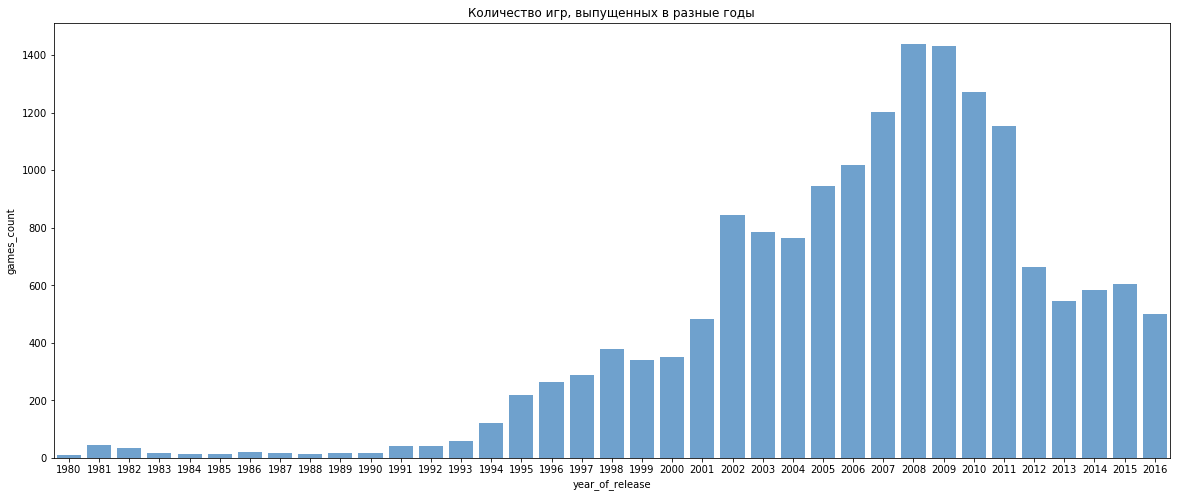

In [15]:
games_per_year = data.pivot_table(index='year_of_release', 
                                           values='name', 
                                           aggfunc='count')
games_per_year.columns = ['games_count']

fig, ax = pyplot.subplots(figsize=(20, 8))
ax.set_title('Количество игр, выпущенных в разные годы')
sns.barplot(x=games_per_year.index, y="games_count", data=games_per_year, color='#5FA2DD')


Данные на графике говорят о том, что с 1994 по 2008 годы количество выпущенных игр постоянно росло. 
Но с 2009 года их количество стало уменьшаться, возможно потому, что рынок заняли мобильные приложения и игры. 

Для анализа нам будут интересны данные с 1994 года - до этого выпускалось слишком мало игр.  

#### 3.2 Рассчитаем изменения продаж по платформам в разные годы

In [16]:
#отфильтруем игры 1994 года и младше:
data_from1994 = data[data['year_of_release']>=1994]

In [17]:
#найдем суммарные продажи платформ c 1994 года и выберем топ-10 с максимальным продажами

platform_total_revenue =data_from1994.pivot_table(index='platform', 
                                           values='total_sales', 
                                           aggfunc='sum')

top_10 = platform_total_revenue.sort_values(
    'total_sales', ascending = False).head(10)

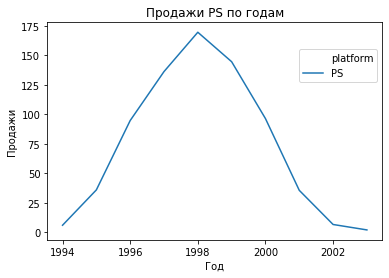

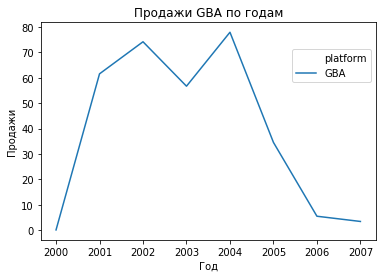

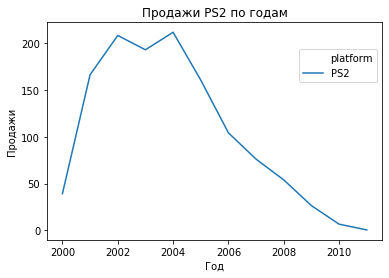

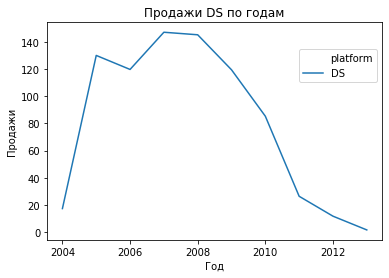

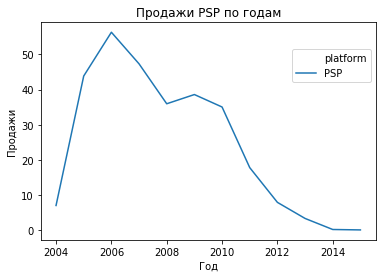

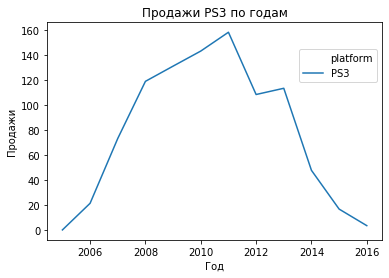

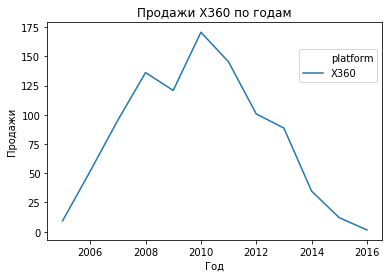

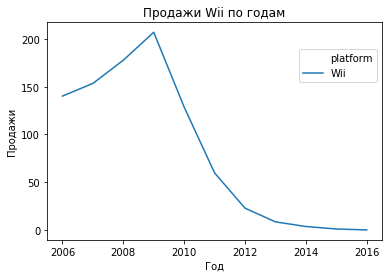

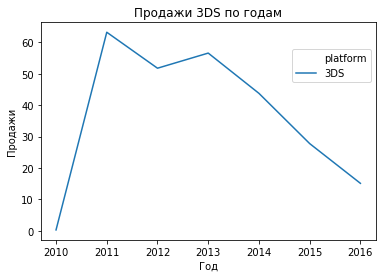

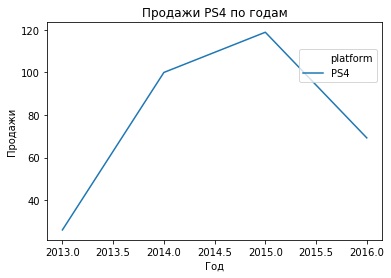

In [18]:
#распределение продаж популярных платформ по годам

top_10_yearly_rev = data_from1994[data_from1994['platform'].isin(top_10.index)].pivot_table(index=['year_of_release','platform'], 
                                           values='total_sales', 
                                           aggfunc='sum')
top_10_yearly_rev = top_10_yearly_rev.reset_index()

platforms = list(top_10_yearly_rev['platform'].unique())

for platform in platforms:
    platfrom_data = top_10_yearly_rev[top_10_yearly_rev['platform'] == platform]
    fig, ax = pyplot.subplots()
    sns.lineplot(x='year_of_release', y='total_sales',hue="platform", 
            data=platfrom_data).legend(loc='right', bbox_to_anchor=(1, 0.8), ncol=1)
    ax.set_title('Продажи '+ platform + ' по годам')
    ax.set(xlabel='Год', ylabel='Продажи')

Найдем среднюю продолжительность жизни игровой платформы:

In [19]:
top5_years = data_from1994[data_from1994['platform'].isin(top_10.index)].groupby(
    by='platform', as_index=False).agg({'year_of_release': pd.Series.nunique})

top5_years.describe()

,year_of_release
count,10.000000
mean,9.800000
std,2.699794
min,4.000000
25%,8.500000
50%,10.500000
75%,12.000000
max,12.000000


Поскольку продолжительность жизни популярной игровой платформы в среднем 10 лет, **актуальным периодом** будем считать 2012-2016 год, так как нам интересен только активный период существования платформы, ведь вклад "угасающих" платформ в 2017 год уже незначителен

#### 3.3 Выведем данные за актуальный период

In [20]:
#отфильтруем таблицу по актуальным данным

relevant_data = data[data['year_of_release']>=2012]

#### 3.4  Выясним, какие платформы лидируют по продажам, на основе полученных данных выберем несколько потенциально прибыльных платформ

[Text(0, 0.5, 'Продажи'), Text(0.5, 0, 'Год')]

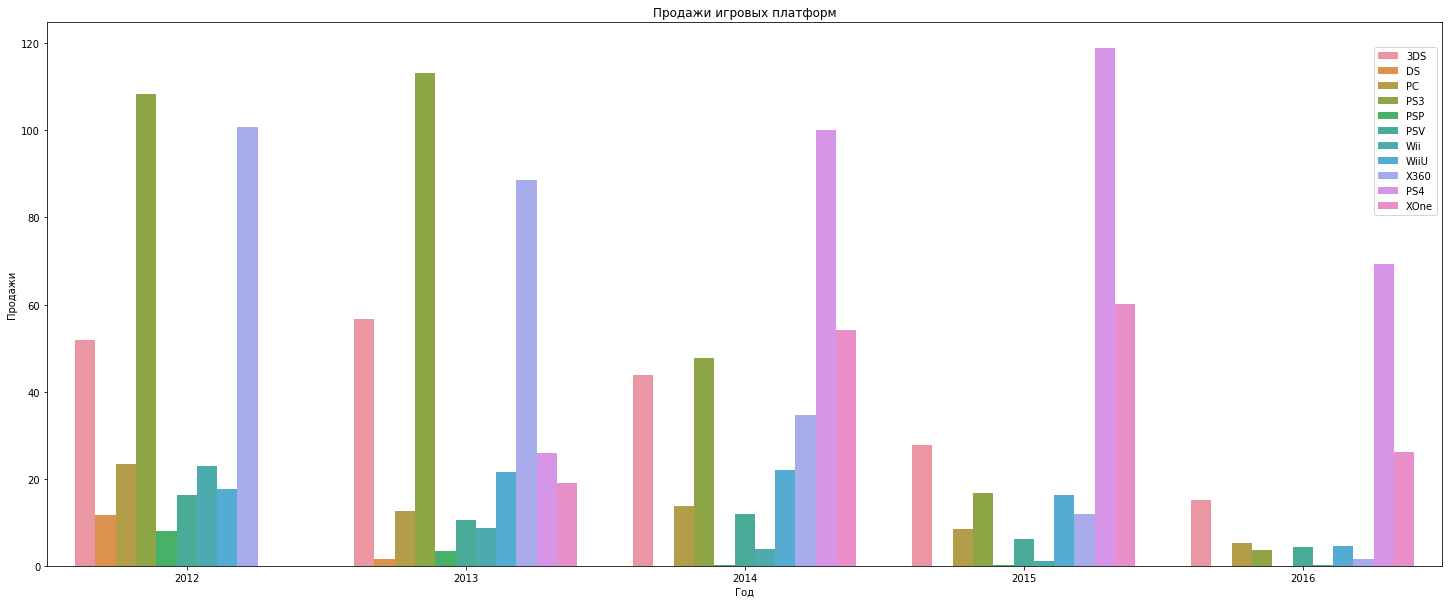

In [21]:
sales = relevant_data.pivot_table(index=['year_of_release','platform'], 
                                           values='total_sales', 
                                           aggfunc='sum')
sales = sales.reset_index()

fig, ax = pyplot.subplots(figsize=(25, 10))

sns.barplot(x='year_of_release', y='total_sales',hue="platform", 
            data=sales).legend(loc='right', bbox_to_anchor=(1, 0.8), ncol=1)
ax.set_title('Продажи игровых платформ')
ax.set(xlabel='Год', ylabel='Продажи')

Исходя из графика, самые прибыльных платформы - PS4, XOne, X360, PS3. 

Лидер - PS4, на втором месте - XOne. Остальные платформы практически исчерпали свой ресурс. Наименее прибыльные - PSP, Wii, PSV.


#### 3.5 Построим график по глобальным продажам игр в разбивке по платформам

Text(0.5, 1, 'Глобальные продажи игровых платформ')

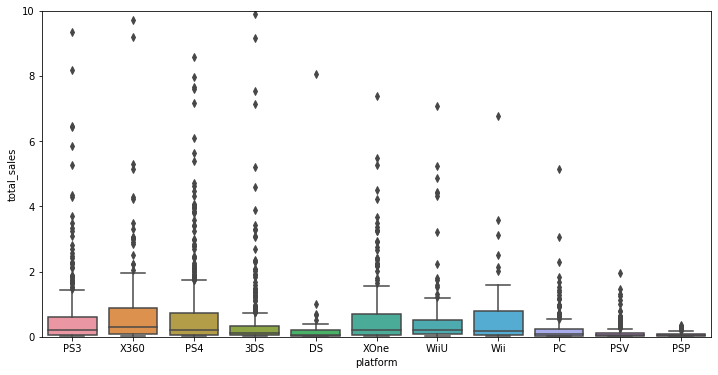

In [22]:
#построим график
plt.figure(figsize=(12,6))
sns.boxplot(x="platform", y="total_sales", data=relevant_data)
plt.ylim(0, 10)
ax.set_title('Глобальные продажи игровых платформ')

Если рассматривать средние значения продаж, то тут лидируют X360, XOne и WiiU. Однако, если рассматривать все продажи, то больше всего популярных игр, обеспечивших значимые продажи, у относятся PS4, PS3, 3DS и X360. 

In [23]:
#посчитаем общую выручку по платформам
relevant_data.pivot_table(index='platform', 
                          values='total_sales', 
                          aggfunc='sum').sort_values('total_sales', ascending = False)

,total_sales
platform,
PS4,314.14
PS3,289.71
X360,237.52
3DS,195.01
XOne,159.32
WiiU,82.19
PC,63.51
PSV,49.18
Wii,36.60


Лидерами продаж за период 2012-2016 являются PS4, PS3, 3DS, X360, XOne. 

Наименее прибыльная платформа - PSP. 

#### 3.5 Влияние  отзывов пользователей и критиков на продажи внутри PS4

In [24]:
#рассчитаем корреляцию продаж с отзывами: 

ps4 = relevant_data[relevant_data['platform']=='PS4']

ps4_corr = ps4[['total_sales', 'critic_score', 'user_score']].corr().head(1)

ps4_corr

,total_sales,critic_score,user_score
total_sales,1.0,0.406568,-0.031957


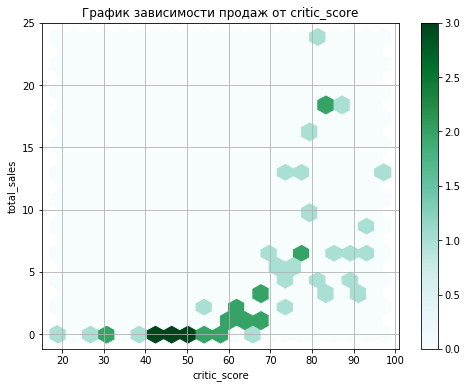

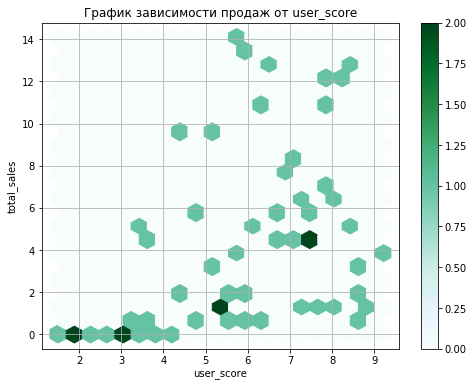

In [25]:
#построим диаграммы рассеяния:

for column in ['critic_score', 'user_score']:
    ps4.pivot_table(index = column, values = 'total_sales', aggfunc = 'sum').reset_index().plot(
        x= column, y='total_sales',
        kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
    plt.title('График зависимости продаж от ' + column)

Отзывы критиков частично влияют на продажи - коэффициент корреляции тут 0.41, а вот отзывы пользователей никак не влияют на продажи - тут коэффициент корреляции - -0.03

#### 3.6 Сравним полученные выводы с продажами игр на других платформах.

In [26]:
#рассчитаем корреляцию продаж с отзывами по платформам: 

for platform in ['PS4', 'PS3', '3DS', 'X360', 'XOne']:
    platf_data = relevant_data[relevant_data['platform'] == platform]
    platf_data_corr = platf_data[['total_sales', 'critic_score', 'user_score']].corr().head(1)
    print(platform)
    print(platf_data_corr)
    print()

PS4
             total_sales  critic_score  user_score
total_sales          1.0      0.406568   -0.031957

PS3
             total_sales  critic_score  user_score
total_sales          1.0      0.331371   -0.005043

3DS
             total_sales  critic_score  user_score
total_sales          1.0      0.320458     0.19815

X360
             total_sales  critic_score  user_score
total_sales          1.0      0.360266    0.006315

XOne
             total_sales  critic_score  user_score
total_sales          1.0      0.416998   -0.068925



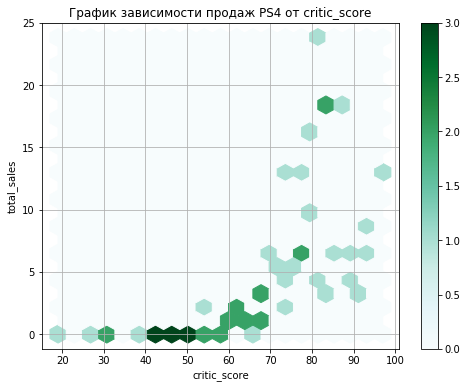

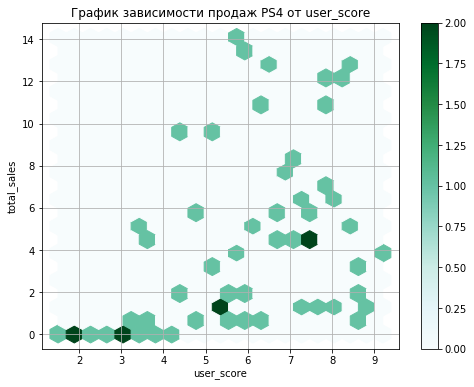

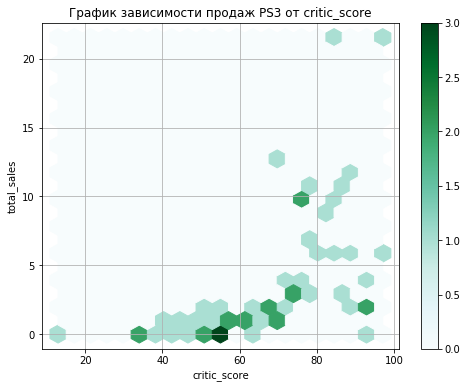

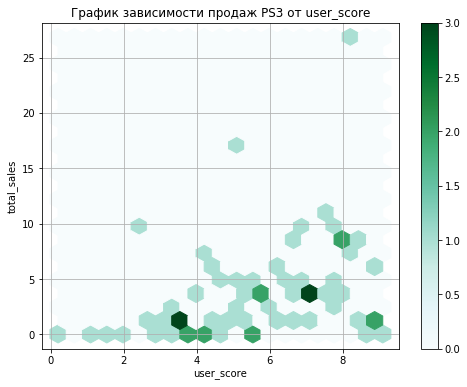

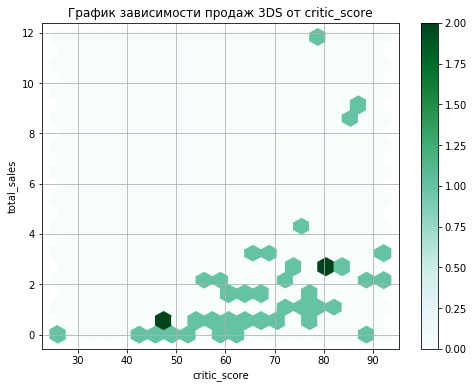

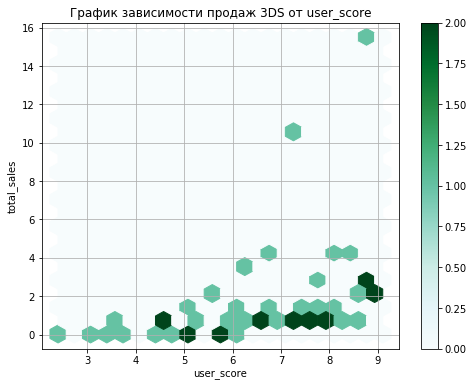

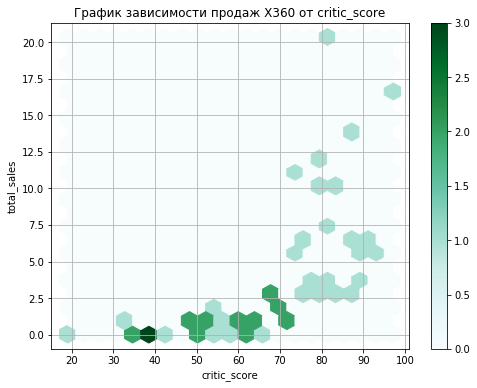

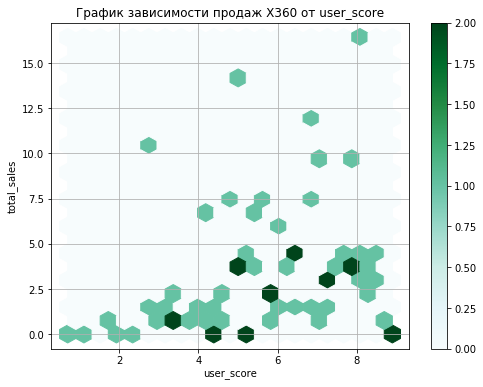

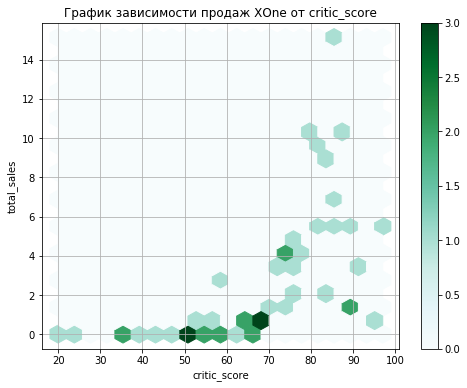

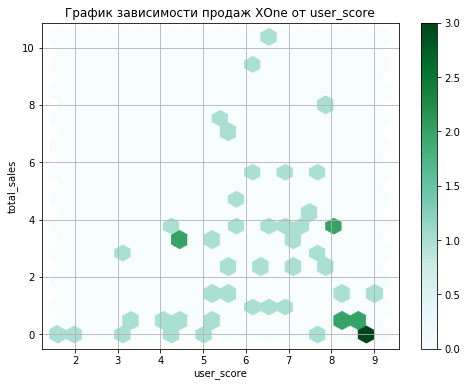

In [27]:
#построим диаграммы рассеяния для каждой платформы:

for platform in ['PS4', 'PS3', '3DS', 'X360', 'XOne']:
    platf_data = relevant_data[relevant_data['platform'] == platform]
    for column in ['critic_score', 'user_score']:
        platf_data.pivot_table(index = column, values = 'total_sales', aggfunc = 'sum').reset_index().plot(
            x= column, y='total_sales',
            kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
        plt.title('График зависимости продаж '+ platform + ' от ' + column)

У других платформ ситуация аналогичкая PS4. 

Из этого делаем вывод, что отзывы критиков имеют среднее влияние на продажи, а отзывы пользователей никакого влияния не имеют. 

#### 3.7 Общее распределение игр по жанрам. Выявим самые прибыльные и наименее прибыльные жанры 

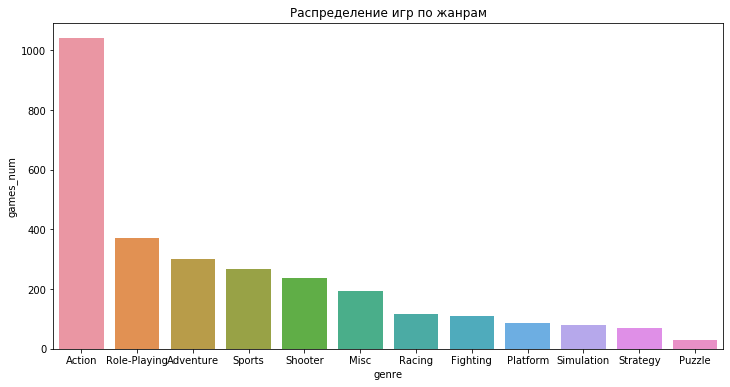

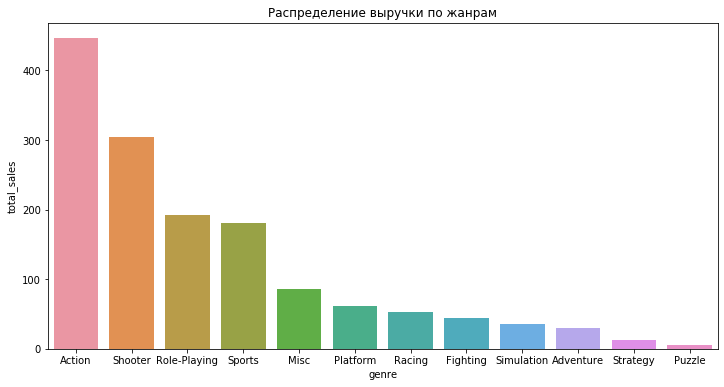

In [28]:
#построим распределение игр по жанрам

genres_data = relevant_data.pivot_table(index = 'genre', values = ['name', 'total_sales'], 
                         aggfunc={'name': 'count', 
                                'total_sales': 'sum'})
genres_data.columns = ['games_num', 'total_sales']

#построим распределение количества игр по жанрам
genres_data1 = genres_data.sort_values(by='games_num', ascending=False)
fig, ax = pyplot.subplots(figsize=(12, 6))
ax.set_title('Распределение игр по жанрам')
sns.barplot(x=genres_data1.index, y="games_num", data=genres_data1)

#построим распределение выручки по жанрам
genres_data2 = genres_data.sort_values(by='total_sales', ascending=False)
fig, ax = pyplot.subplots(figsize=(12, 6))
ax.set_title('Распределение выручки по жанрам')
sns.barplot(x=genres_data2.index, y="total_sales", data=genres_data2)

Как мы видим,  по количеству произведенных игр и по продажам лидирует жанр action. На втором месте по количеству игр - жанр role-playing, а по продажам - жанр shooter. Наименее прибыльными являются жанры strategy и puzzle, по количеству всех игр они так же на последнем месте. 

### Вывод

- С 1994 по 2008 годы количество выпущенных игр постоянно росло, однако с 2009 года их количество стало уменьшаться, так как рынок заняли мобильные приложения и игры. 

- Средняя продолжительность жизни игровой платформы  -  10 лет. 

- Самые прибыльные платформы за последние 5  лет - PS4, XOne, X360, PS3. Наименее прибыльные - PSP, Wii, PSV.

- Отзывы критиков имеют среднее влияние на продажи игр, а отзывы пользователей никакого влияния не имеют. Из этого можно сделать вывод, что отзывы критиков для игроков важнее отзывов самих игроков.  

- По количеству произведенных игр и по продажам лидирует жанр action. На втором месте по количеству игр - жанр role-playing, а по продажам - жанр shooter. Наименее прибыльными являются жанры strategy и puzzle, по количеству всех игр они так же на последнем месте. 

###  Шаг 4.  Портрет пользователя каждого региона (NA, EU, JP)

#### 4.1 Выделим топ-5 самых популярных платформ в этих регионах

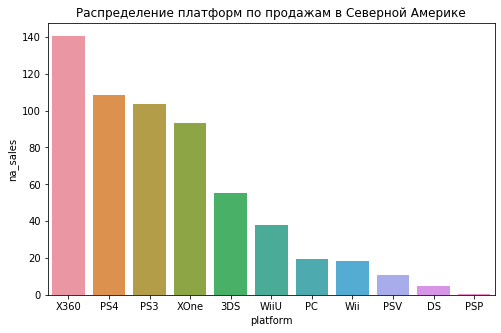

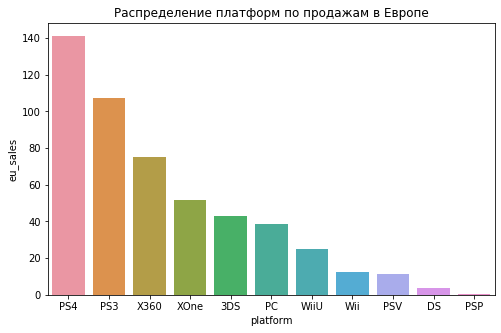

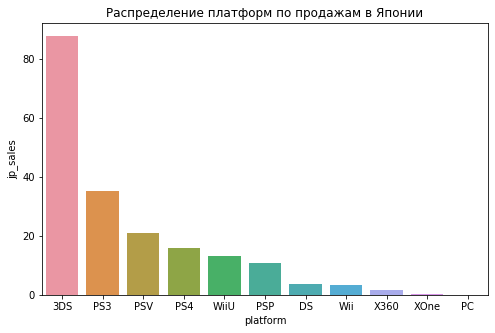

In [29]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
        reg_sales = relevant_data.pivot_table(index = 'platform', values = column, aggfunc = 'sum')
        reg_sales = reg_sales.sort_values(by=column, ascending=False)
        fig, ax = pyplot.subplots(figsize=(8, 5))
        if column == 'na_sales':
            ax.set_title('Распределение платформ по продажам в Северной Америке')
            sns.barplot(x=reg_sales.index, y=column, data=reg_sales)
        if column == 'eu_sales':
            ax.set_title('Распределение платформ по продажам в Европе')
            sns.barplot(x=reg_sales.index, y=column, data=reg_sales)
        if column == 'jp_sales':
            ax.set_title('Распределение платформ по продажам в Японии')
            sns.barplot(x=reg_sales.index, y=column, data=reg_sales)

In [30]:
#рассчитаем доли продаж для платформ
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    reg_sales = relevant_data.pivot_table(index='platform',
                                          values=column, aggfunc='sum').sort_values(column, ascending=False)
    reg_sales['ratio'] = round(reg_sales[column] / reg_sales[column].sum(), 2)
    print(reg_sales.head(5))

          na_sales  ratio
platform                 
X360        140.57   0.24
PS4         108.74   0.18
PS3         103.74   0.17
XOne         93.12   0.16
3DS          55.49   0.09
          eu_sales  ratio
platform                 
PS4         141.09   0.28
PS3         107.27   0.21
X360         74.89   0.15
XOne         51.59   0.10
3DS          42.83   0.08
          jp_sales  ratio
platform                 
3DS          87.79   0.46
PS3          35.29   0.18
PSV          21.04   0.11
PS4          15.96   0.08
WiiU         13.01   0.07


Топ-5 платформ по продажам в Северной Америке: X360, PS4, PS3, XOne, 3DS

Топ-5 платформ по продажам в Европе: PS4, PS3, X360, XOne, 3DS

Топ-5 платформ по продажам в Японии: 3DS, PS3, PSV, PS4, WiiU

В Северной Америке и Европе набор топ-5 платформ одинаковый и различается только долями, однако в геймеры Японии предпочитают совершенно другие платформы: здесь почти 50% продаж приходится на 3DS, которая на западе занимает только 5 место

#### 4.2 Выделим топ-5 самых популярных жанров в этих регионах

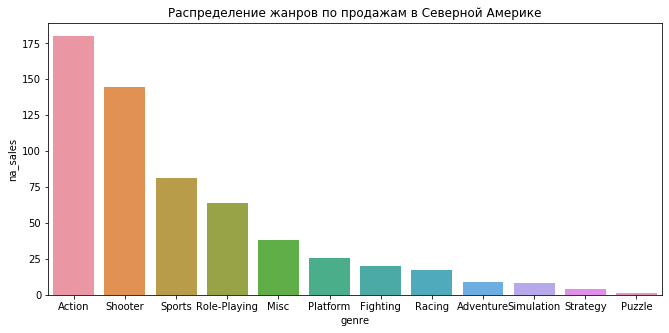

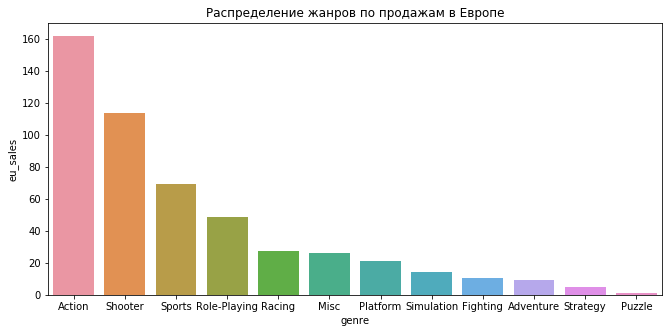

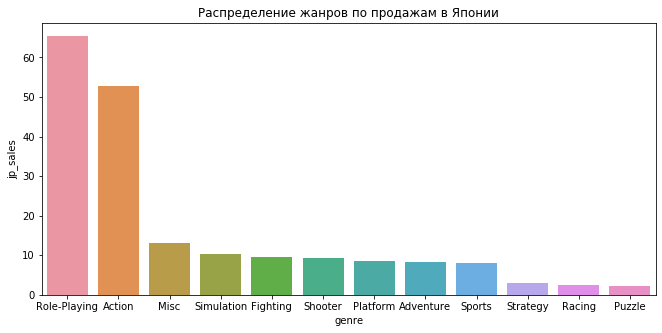

In [31]:
#построим распределения
for column in ['na_sales', 'eu_sales', 'jp_sales']:
        genre_sales = relevant_data.pivot_table(index = 'genre', values = column, aggfunc = 'sum')
        genre_sales = genre_sales.sort_values(by=column, ascending=False)
        fig, ax = pyplot.subplots(figsize=(11, 5))
        if column == 'na_sales':
            ax.set_title('Распределение жанров по продажам в Северной Америке')
            sns.barplot(x=genre_sales.index, y=column, data=genre_sales)
        if column == 'eu_sales':
            ax.set_title('Распределение жанров по продажам в Европе')
            sns.barplot(x=genre_sales.index, y=column, data=genre_sales)
        if column == 'jp_sales':
            ax.set_title('Распределение жанров по продажам в Японии')
            sns.barplot(x=genre_sales.index, y=column, data=genre_sales)

In [32]:
#рассчитаем доли продаж для платформ
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    reg_sales = relevant_data.pivot_table(index='genre',
                                          values=column, aggfunc='sum').sort_values(column, ascending=False)
    reg_sales['ratio'] = round(reg_sales[column] / reg_sales[column].sum(), 2)
    print(reg_sales.head(5))

              na_sales  ratio
genre                        
Action          180.15   0.30
Shooter         144.79   0.24
Sports           81.53   0.14
Role-Playing     64.00   0.11
Misc             38.19   0.06
              eu_sales  ratio
genre                        
Action          161.70   0.32
Shooter         113.47   0.22
Sports           69.09   0.14
Role-Playing     48.53   0.10
Racing           27.29   0.05
              jp_sales  ratio
genre                        
Role-Playing     65.44   0.34
Action           52.80   0.27
Misc             13.10   0.07
Simulation       10.41   0.05
Fighting          9.44   0.05


Топ-5 жанров по продажам в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc

Топ-5 жанров по продажам в Европе: Action, Shooter, Sports, Role-Playing, Racing

Топ-5 жанров по продажам в Японии: Role-Playing, Action, Misc, Simulation, Fighting

В Северной Америке и Европе набор топ-5 платформ отличается только пятой позицией: в Америке на пятом месте находится жанр Misc,а в Европе - Racing. В лидерах в обоих регионах жанр Action.

Япония, как обычно, идет свои путем и тут лидируют другие жанры: начинает пятерку жанров Role-Playing, а замыкает жанр Fighting. Такое отличие от западных регионов вызвано менталитетом японцев. 

#### 4.3 Влияние  рейтинга ESRB на продажи в отдельном регионе

Так как в рейтингах много пропусков, посмотрим, есть ли зависимость между рейтингом и жанром в данных за актуальный период:

In [33]:
#посчитаем количество пропусков в столбце rating

print('Количество пропусков в столбце rating:',len(relevant_data[relevant_data['rating'].isna()==True]))

Количество пропусков в столбце rating: 1276


In [34]:
pd.set_option('mode.chained_assignment', None)

#создадим таблицу без пропусков рейтингах

clear_ratings = relevant_data[relevant_data['rating'].isna()==False]

#добавим 2 столбца к основной таблице, присвоив жанрам и рейтингам числа через LabelEncoder

clear_ratings['rating_num'] = le.fit_transform(clear_ratings['rating'])
clear_ratings['genre_num'] = le.fit_transform(clear_ratings['genre'])

In [35]:
#рассчитаем корреляцию между жанром и рейтингом
round(clear_ratings['rating_num'].corr(clear_ratings['genre_num']), 2)

-0.19

Есть коррелляция, но слабая и обратная. Однако, зависимость между жанром и рейтингом выше, чем между рейтигом и любым другим признаком. Интерпретируем ее как то, что, например, у игр жанра Action рейтинги M и T будут встречаться немного чаще, чем 'E' и'E10+'

In [36]:
#создадим таблицу с рейтингами и их числовыми значениями
ratings_match = pd.DataFrame.from_dict({'rating_num': [0, 1, 2, 3], 'rating': ['E', 'E10+', 'M', 'T']})

#выведем медианные рейтинги для каждого жанра и вернем рейтингам их названия
median_ratings = clear_ratings.pivot_table(index='genre',values='rating_num', aggfunc='median').reset_index()
median_ratings['rating_num'] = median_ratings['rating_num'].astype(int)
median_ratings = median_ratings.merge(ratings_match, on = 'rating_num')
median_ratings.head()

,genre,rating_num,rating
0,Action,2,M
1,Adventure,2,M
2,Role-Playing,2,M
3,Shooter,2,M
4,Strategy,2,M


In [37]:
#заменим пропущенные значения в основной таблице на медианные рейтинги
for index, row in median_ratings.iterrows():
    relevant_data.loc[(relevant_data['rating'].isnull()) & (relevant_data['genre'] == row['genre']) , 
                      'rating'] = row['rating']

In [38]:
#рассчитаем доли продаж по рейтингам
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    reg_sales = relevant_data.pivot_table(index='rating',
                                          values=column, aggfunc='sum').sort_values(column, ascending=False)
    reg_sales['ratio'] = round(reg_sales[column] / reg_sales[column].sum(), 2)
    print(reg_sales)

        na_sales  ratio
rating                 
M         304.46   0.51
E         118.70   0.20
E10+       96.81   0.16
T          73.33   0.12
        eu_sales  ratio
rating                 
M         254.37   0.50
E         122.49   0.24
E10+       76.01   0.15
T          56.31   0.11
        jp_sales  ratio
rating                 
M         106.87   0.55
E          34.42   0.18
T          31.30   0.16
E10+       20.23   0.10


В Америке и Европе наибольшей популярностью пользуются игры с рейтингом М (старше 17 лет), а в Японии первое место по продажам  занимают игры с рейтингом M (от 17 лет и старше) - на них приходится 55% всей выручки, на втором месте идут игры с рейтингом E (возраст 0+). 

### Вывод

Среднестатистический пользователь североамериканского региона выбирает платформы X360 или PS4, предпочитает игры жанра Action c рейтигом М. 

Среднестатистический европейский пользователь выбирает платформы PS4 и PS3, предпочитает игры жанра Action c рейтигом М ( в этом он совпадает с североамериканскими игроками)

В Японии игроки предпочитают играть на 3DS, их любимый игры - игры жанра Role-Playing с категорией E.

###  Шаг 5. Проверка гипотез

#### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

𝐻0 — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

𝐻1 — средние пользовательские рейтинги платформ Xbox One и PC различаются.

Перед проверкой гипотез сравним дисперсии выборок, чтобы правильно установить параметр equal_var

In [39]:
xone_rating_var = relevant_data[relevant_data['platform'] == 'XOne'].pivot_table(index='platform', values=['user_score'], 
                                  aggfunc=np.var)
pc_rating_var = relevant_data[relevant_data['platform'] == 'PC'].pivot_table(index='platform', values=['user_score'], 
                                  aggfunc=np.var)

print('Дисперсии выборок отличаются на {:.2%}'.format(1 - xone_rating_var['user_score'][0]/pc_rating_var['user_score'][0]))

Дисперсии выборок отличаются на 30.58%


<font color='green'>Молодец, что не забываешь сравнить диперсии.

In [40]:
#проверяем гипотезу

xone = relevant_data['user_score'][(relevant_data['platform'] == 'XOne')&(relevant_data['user_score'].isna()==False)]

pc = relevant_data['user_score'][(relevant_data['platform'] == 'PC')&(relevant_data['user_score'].isna()==False)]

alpha = .05

results = st.ttest_ind(xone, pc, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.6206366351489678
Не получилось отвергнуть нулевую гипотезу


In [41]:
#посмотрим на различие средних рейтигов
relevant_data[relevant_data['platform'].isin(['XOne', 'PC'])].pivot_table(
    index='platform', values='user_score', aggfunc='median')

,user_score
platform,
PC,6.8
XOne,6.8


 Тест показал, что гипотезу о равенстве среднего пользовательского рейтинга для XOne и PC не получилось отвергнуть

#### Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.

𝐻0 — средние пользовательские рейтинги жанров Action и Sports одинаковые.

𝐻1 — средние пользовательские рейтинги жанров Action и Sports различаются.

Перед проверкой гипотез сравним дисперсии выборок, чтобы правильно установить параметр equal_var

In [42]:
action_rating_var = relevant_data[relevant_data['genre'] == 'Action'].pivot_table(index='genre', values=['user_score'], 
                                  aggfunc=np.var)
sports_rating_var = relevant_data[relevant_data['genre'] == 'Sports'].pivot_table(index='genre', values=['user_score'], 
                                  aggfunc=np.var)

print('Дисперсии выборок отличаются на {:.2%}'.format(1 - action_rating_var['user_score'][0]/sports_rating_var['user_score'][0]))

Дисперсии выборок отличаются на 37.74%


In [43]:
#проверяем гипотезу

action = relevant_data['user_score'][(relevant_data['genre'] == 'Action')&(relevant_data['user_score'].isna()==False)]

sports = relevant_data['user_score'][(relevant_data['genre'] == 'Sports')&(relevant_data['user_score'].isna()==False)]

alpha = .05

results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.337200239591976e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза опровергнута. Посмотрим, на сколько различаются средний пользовательский рейтинг: 

In [44]:
#посмотрим на различие средних рейтигов
relevant_data[relevant_data['genre'].isin(['Action', 'Sports'])].pivot_table(
    index='genre', values='user_score', aggfunc='median')

,user_score
genre,
Action,7.2
Sports,5.7


Пользовательские рейтинги жанров Action и Sports отличаются примерно на 20%, рейтинги игр жанра Action выше.

###  Шаг 6. Общий вывод

Исследование показало, что потенциально успешная игра должна обладать рядом характеристик:

1. На сегодняшний день игра должна быть выпущена  для платформ X360 или PS4, если речь идет о рынках Северной Америки и Европы, и для платформы 3DS, если игру планируется продавать в Японии.
2. Игровые платформы в среднем приносят прибыль в течение 10 лет, пик продаж приходится примерно на середину этого цикла, поэтому продавать игры на старых платформах нет смысла. 
3. Игра должна быть выпущена в жанре Action или Shooter для западных стран и в жанре Role-Playing — для Японии.
4. В Америке и Европе наибольшей популярностью пользуются игры с рейтингом М (старше 17 лет), в Японии также первое место по продажам занимают игры с рейтингом М, за ним с небольшим отрывом идут игры с рейтингом E (возраст 0+).
5. Ориентироваться на оценки пользователей нет смысла, так как они не влияют на продажи, зато оценки критиков могут на них влиять.  
6. Однако, если все же ориентироваться на пользовательские рейтинги, то стоит иметь в виду, что  рейтинги жанров Action и Sports отличаются примерно на 20%, причем рейтинги игр жанра Action выше.
